In [109]:
# Importing the libraries to be used:
# The reference of the code below is from hw5 programming assignment
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline 

In [110]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [111]:
train_size = int(X.shape[0]/5*4)
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

In [112]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver= 'saga', max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    weight_logreg.append(logreg.coef_[0])
    intercept_logreg.append(logreg.intercept_)

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train)
    prec_logreg.append(prec[0])
    recal_logreg.append(recal[0])
    fscore_logreg.append(fscore[0])

In [113]:
def plot_acc(acc_train, acc_test, lamb):
    plt.xlabel('log of lambda')
    plt.ylabel('accuracy')
    plt.title("Accuracy vs log of lambda.")
    plt.grid()
    plt.scatter(np.log10(lamb),acc_train,color='green', label = "training")
    plt.scatter(np.log10(lamb),acc_test,color='blue', label = "testing")
    plt.legend(['Training Accuracy', 'Test Accuracy'], )
    plt.show(block=False)

In [114]:
def plot_pre(prec, recal, fscore,lamb):
    plt.xlabel('log of lambda')
    plt.title("Accuracy vs log of lambda.")
    plt.grid()
    plt.scatter(np.log10(lamb),prec,color='green', label = "precision")
    plt.scatter(np.log10(lamb),recal,color='blue', label = "recall")
    plt.scatter(np.log10(lamb),fscore,color='yellow', label = "fscore")
    plt.legend(['precision', 'recall', "fscore"], )
    plt.show(block=False)

In [115]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])

In [116]:
# lamb = [i/1000 for i in range(1,10000,10)]
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]
acc_train_logreg = [] 
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)



0.858554342173687 10


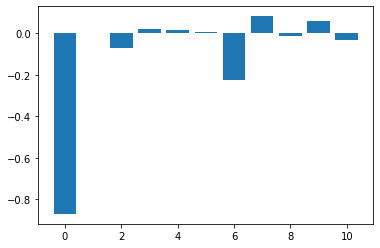

In [118]:
plot_weight(acc_test_logreg, weight_logreg)

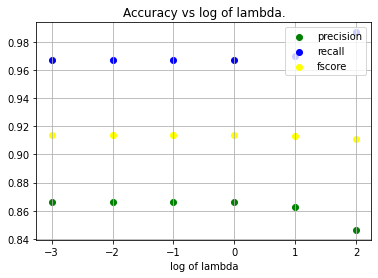

In [119]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

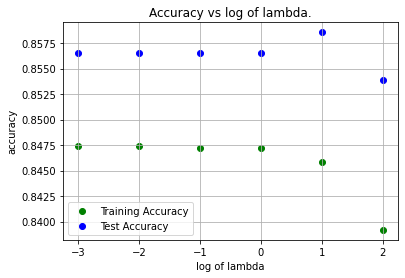

In [120]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [121]:
def logreg_model2(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l2', C=c, max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    weight_logreg2.append(logreg.coef_[0])
    intercept_logreg2.append(logreg.intercept_)

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train)
    prec_logreg2.append(prec[0])
    recal_logreg2.append(recal[0])
    fscore_logreg2.append(fscore[0])

In [122]:
acc_train_logreg2 = [] 
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_train, Y_train, X_test, Y_test)

0.8564742589703588 0.001


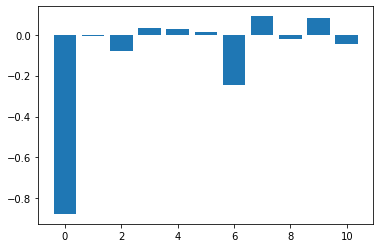

In [123]:
plot_weight(acc_test_logreg2, weight_logreg2)

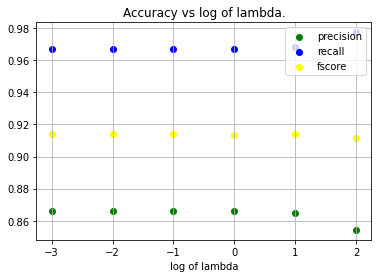

In [124]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

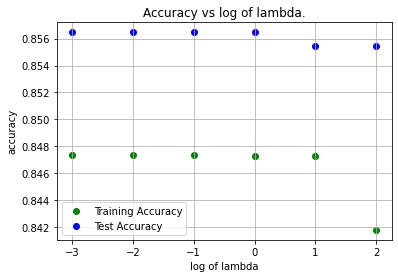

In [125]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures(2)

In [128]:
X_transformed = poly.fit_transform(df1[:,:-1])
scaler = preprocessing.StandardScaler().fit(X_transformed)
X_transformed = scaler.transform(X_transformed)
X_transformed_train = X_transformed[:train_size]
X_transformed_test = X_transformed[train_size:]

In [129]:
acc_train_logreg = []
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)

0.8627145085803433 1


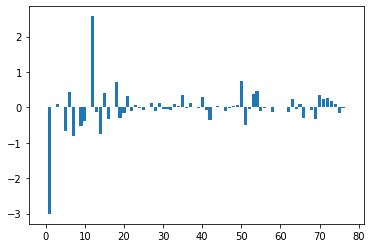

In [130]:
plot_weight(acc_test_logreg, weight_logreg)

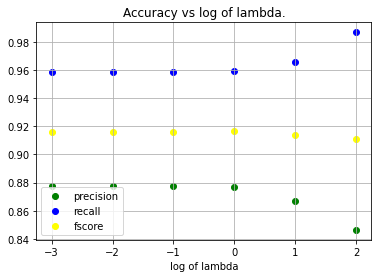

In [131]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

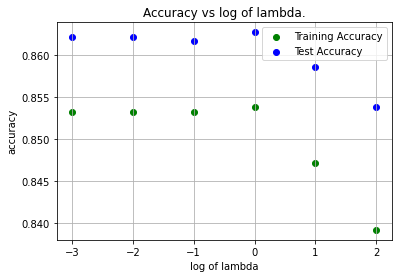

In [132]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [133]:
acc_train_logreg2 = []
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_transformed_train, Y_train, X_transformed_test, Y_test)

0.8621944877795111 0.001


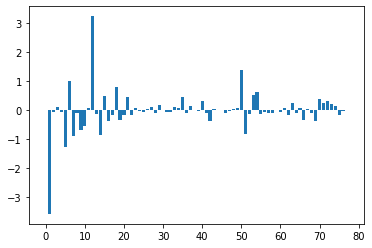

In [134]:
plot_weight(acc_test_logreg2, weight_logreg2)

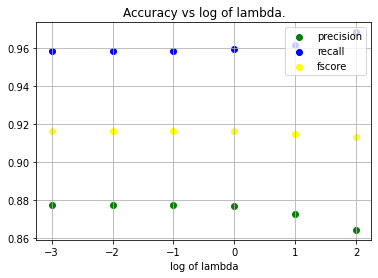

In [135]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

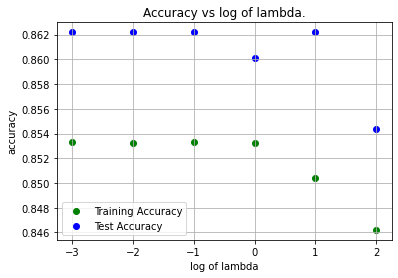

In [136]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)